# Projeto Integrado Sprint 7: Zuber #

Objetivos: 

Entender as preferências dos passageiros, para ajudar a estabelecer novos padrões dentro da empresa, que sejam mais alinhados com os maiores interesses dos clientes.

Entender o impacto de fatores internos na quantidade e na qualidade das corridas da Zuber para encontrar as melhores práticas de trabalho para cada dia, independentemente de qualquer fator fora do controle da empresa.

Até aqui, no projeto, usamos SQL e fizemos consultas para encontrar e organizar todos os dados pertinentes às corridas da Zuber. Agora, com os arquivos CSV em mãos, é hora de começar a analise em python, criando os gráficos e desenvolvendo hipóteses. No passo a passo, vamos importar os arquivos e as bibliotecas necessárias e fazer um rápido pré processamento de dados para garantir que está tudo nos conformes. Só então, avançarem0os com a criação de gráficos e a avaliação de hipóteses. 

The initial data exploration and hypothesis setup were performed using SQL queries before loading the data into this notebook.

You can find all queries used in the [zuber_queries.sql](./zuber_queries.sql) file.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

## Carregando, Estudando e Verificando Dados

In [40]:
df_taxi_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
df_taxi_companies.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [41]:
df_trips = pd.read_csv('/datasets/project_sql_result_04.csv')
df_trips.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [42]:
df_taxi_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [43]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Até aqui, carregamos as bibliotecas e os dataframes, criamos nomes para ambos os dataframes, verificamos que eles carregaram corretaemnte e chamamos o info para obter mais informações sobrea as tabelas. Como resultado, percebemos que não temos valores ausentes, o que já era esperado, e que os tipos de dados parecem corretos para todas as colunas. Não há nenhuma outra ação necessária no pré processamento.

## Verificando Bairros e Montando gráficos

### Descobrindo os 10 bairros mais procurados como destino de viagens

In [44]:
top_10_bairros = df_trips.sort_values(by='average_trips', ascending=False).head(10)
top_10_bairros.index = range(1, 11)
top_10_bairros

,dropoff_location_name,average_trips
1,Loop,10727.466667
2,River North,9523.666667
3,Streeterville,6664.666667
4,West Loop,5163.666667
5,O'Hare,2546.900000
6,Lake View,2420.966667
7,Grant Park,2068.533333
8,Museum Campus,1510.000000
9,Gold Coast,1364.233333
10,Sheffield & DePaul,1259.766667


Aqui, como o projeto solicitava, descobrimos os dez bairros mais procurados como destinos de viagens. Por uma questão de estilo, numeramos o index para ir de 1 a 10, ao invés de 0 a 9. 

Só pela análise dessa tabela, percebemos que o bairro loop é o mais procurado e que ele e River North têm uma considerável distância para o terceiro colocado. também percebemos que O'hare, onde fica o aeroporto, está apenas em quinto e bem longe do quarto colocado.

Uma rápida pesquisa indicou que o bairroLoop abriga o segundo maior distrito de negócios dos Estados Unidos. Além disso, o bairro conta com excelentes opçoes de turismo, o que justifica a procura.

### Criando Gráficos

#### Empresas de Táxi e Números de Corrida

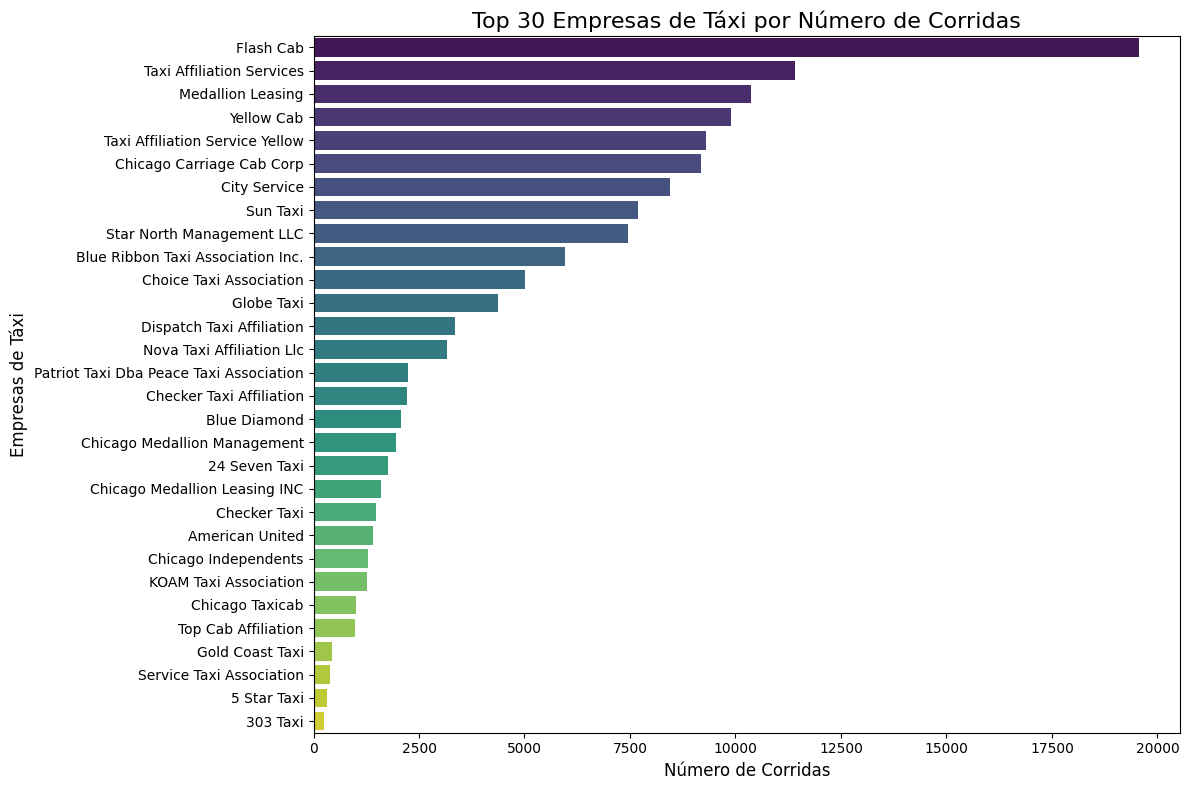

In [45]:
df_top_30_companies = df_taxi_companies.sort_values(by='trips_amount', ascending=False).head(30)

plt.figure(figsize=(12, 8))
sns.barplot(data=df_top_30_companies, x='trips_amount', y='company_name', palette='viridis')

plt.title('Top 30 Empresas de Táxi por Número de Corridas', fontsize=16)
plt.xlabel('Número de Corridas', fontsize=12)
plt.ylabel('Empresas de Táxi', fontsize=12)
plt.tight_layout()

plt.show()



No código acima, criamos o gráfico que mostra a quantidade de corridas por empresa dentro de Chicago. Em um primeiro momento, fiz um gráfico ue englobava todas as empresas, mas, por uma questão de visualização, optei por redzir o número de empresas representado para 30. Escolhi o 30, porque, mesmo neese espectro, algumas empresas já apresentam valores muito baixos para serem significativos. Fazer maior do que isso seria desnecessário

Aqui, tornamos a perceber algumas coisas interessantes. Primeiro, a empresa Flash Cab domina o mercado de táxis em Chicago e tem quase o dobro de corridas do que a segunda colocada. Da Taxi Affiliation Services até a Blue Ribbon Taxi, temos uma decida não tão acentuada, indicando que todas competem próximas umas das outras. Da Choice Taxi até a a Nova Taxi percebemos que a queda já se tornou realmente vertiginosa e que os números ficam muito distantes da taxi Affiliation, em segundo, quem dira em comparação à Flash Cab.

Daí para baixo, os valores começam a indicar parcelas realmente pequenas de participação no mercado de taxis na cidade. Fatores que poderiam explicar isso são tempo de existência e notoriedade já conquistada, trabalho de marketing reduzido e foco em público nixado ou de bairros muito específicos, com menos movimento. As quatro últimas tem valores tão pequenos que poderiam ser consid3erados insignificantes em termos de uma análise macroscópica de mercado.

#### Top 10 Bairros de Destino

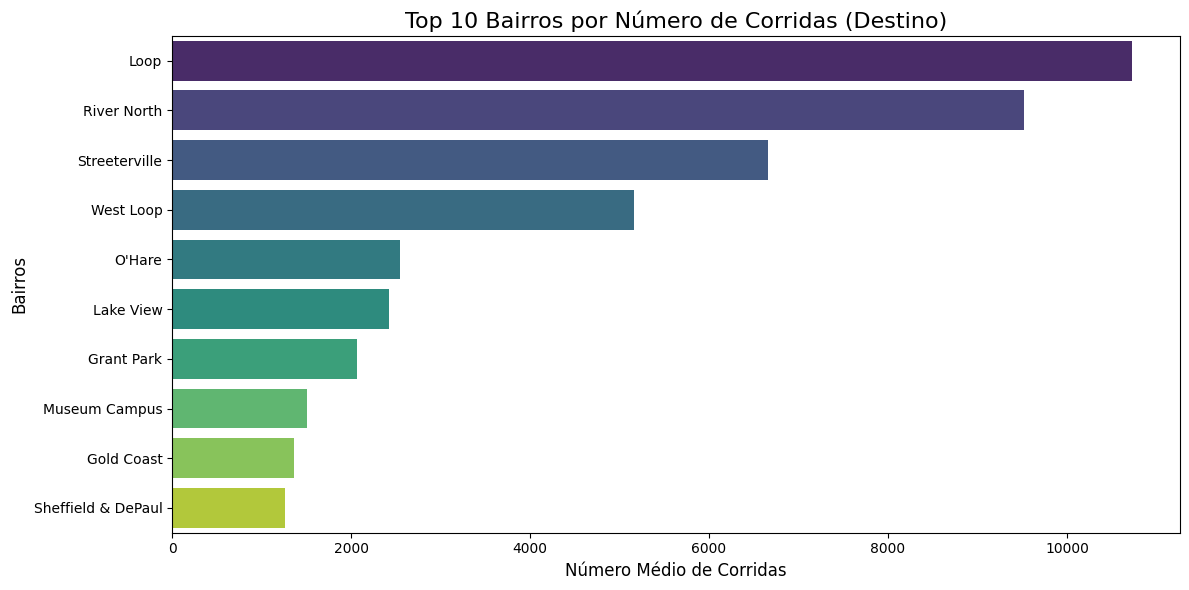

In [46]:
# Selecionar os 10 bairros mais procurados
df_top_10_bairros = df_trips.sort_values(by='average_trips', ascending=False).head(10)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=df_top_10_bairros, x='average_trips', y='dropoff_location_name', palette='viridis')

# Personalizar o gráfico
plt.title('Top 10 Bairros por Número de Corridas (Destino)', fontsize=16)
plt.xlabel('Número Médio de Corridas', fontsize=12)
plt.ylabel('Bairros', fontsize=12)
plt.tight_layout()

# Exibir o gráfico
plt.show()


Nessas linhas de código, apenas criamos o segundo gráfico solicitado pelo exercício. Como era um top 10, não houve necessidade de filtrar dados por questões de visualização

In [47]:
average_loop = df_trips[df_trips['dropoff_location_name'] == 'Loop']['average_trips'].mean()
average_loop

10727.466666666667

In [48]:
top_10_bairros = df_trips.sort_values(by='average_trips', ascending=False).head(10)

six_last_top_10_bairros = top_10_bairros.tail(6)

average_six_last_top_10_sum = six_last_top_10_bairros['average_trips'].sum()
average_six_last_top_10_sum

11170.4

Como a análise da tabela já indicava, nós temos um considerável domínio dos bairros loop e River North, que são disparados os destinos mais procurados pelos clientes. Uma queda considerável depois, nós temos Streeterville e West Loop. E, depois de mais uma queda grande nos números, os últimos seis, encabeçados por O'Hare e finalizados por Sheffield & DePaul.

Os códigos logo acima servem para mostrar que a somatória das corridas dos últimos seis bairros do top 10 quase não supera a quantidade de corridas para o Bairro Loop, o que evidencia ainda mais a distância e a grande parcela que Loop tem dentre todos os destinos. Uma boa estratégia seria garantir que os carros estejam posicionados nos bairros dos quais as corridas com o destino para o top 4 sejam mais solicitadas.

### Testando a Hipótese

Nessa etapa, vamos testar a hipótese proposta pelo projeto, que é: "A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos." 

Assim, estabeleci que a hipótese nula é: A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare NÃO muda nos sábados chuvosos. A hipótese alternativa é a própria confirmação da hipótese proposta. Isso porque, por padrão, a hipótese nula nega qualquer hipótese e a alternativa é a que confirma. O valor alpha estabelecido será de 5%, que é o padrão de mercado. Antes disso, vamos apenas carregar o novo dataframe recebido

In [51]:
df_weather = pd.read_csv('/datasets/project_sql_result_07.csv')

In [52]:
good_weather = df_weather[df_weather['weather_conditions'] == 'Good']['duration_seconds']
bad_weather = df_weather[df_weather['weather_conditions'] == 'Bad']['duration_seconds']

alpha = 0.05  # Nível de significância

t_stat, p_value = ttest_ind(good_weather, bad_weather, equal_var=False)

print("Estatística do teste t:", t_stat)
print("Valor-p:", p_value)

if p_value < alpha:
    print("Rejeitamos a hipótese nula: A duração média das corridas muda nos sábados chuvosos.")
else:
    print("Não rejeitamos a hipótese nula: A duração média das corridas não muda nos sábados chuvosos.")


Estatística do teste t: -7.186034288068629
Valor-p: 6.738994326108734e-12
Rejeitamos a hipótese nula: A duração média das corridas muda nos sábados chuvosos.


O resultado do nosso teste de hipótese indica que a hipótese nula pode ser rejeitada e que a hipótese alternativa está correta. Isso faz sentido, porque tradicionalment, as condições chuvosas implicam numa diminuição geral da velocidade dos veículos, que precisam tomar mais cuidado. Além disso, o número de carros também aumenta, porque andar a pé e ou com trasnportes como bicicletas, por exemplo, costuma ser evitado.

## Conclusão

Com isso finalizamos o projeto do Sprint completando todos os passos propostos. Nos primeiros passos, trabalhamos com consultas para garantir que tínhamos dados bem estruturados para fazer boas análises sobre o mercado de Taxis em Chcicago. Daí pra frente, conseguimos mostrar algumas tendências, como a procura considerável por carros da Flah Cab, bem como alguns dos bairros preferidos e mais procurados pelos Cidadãos, que buscam consideravelmente mais as regiões Loop e River North. Para completar, provamos que o tempo interfere no tempo médio de viagens aos sábados, validando uma hipótese alternativa que realmente faz sentido.